In [31]:
#加载葡萄酒数据集
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
print(df_wine.head(5))

   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  


In [32]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
#通过随机森林判定特征的重要性,请记住无需对基于树的模型做标准化或归一化处理
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))
#特征重要性要进行归一化处理

 1) 1                              0.182483
 2) 2                              0.158610
 3) 3                              0.150948
 4) 4                              0.131987
 5) 5                              0.106589
 6) 6                              0.078243
 7) 7                              0.060718
 8) 8                              0.032033
 9) 9                              0.025400
10) 10                             0.022351
11) 11                             0.022078
12) 12                             0.014645
13) 13                             0.013916


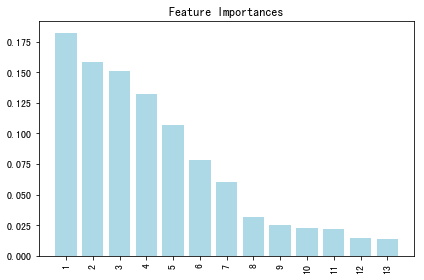

In [34]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [39]:
#将数据集压缩到三个重要特征
#这个函数找不到了，直接把这三个特征列提取出来就行
X_selected = forest.transform(X_train, threshold=0.15)
print(X_selected.shape)

AttributeError: 'RandomForestClassifier' object has no attribute 'transform'